https://github.com/herbwood/pytorch_faster_r_cnn/blob/main/faster_r_cnn.ipynb

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

import cv2

import matplotlib.pyplot as plt

import numpy as np

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("GPU build")
else:
    device = torch.device('cpu')
    print("CPU build")
    
print(device)


GPU build
cuda:0


Data processing
* Visualize image and bounding boxes

In [3]:
img0 = "/home/control/dataset/macroact/several/1/gettyimages-146171453-640_adpp_001.jpg"
img0 = cv2.imread(img0)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

(360, 640, 3)


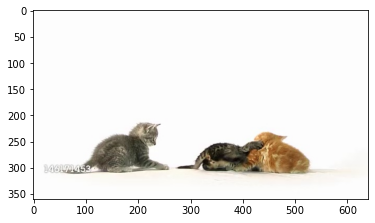

In [4]:
print(img0.shape)
plt.imshow(img0)
plt.show()

In [5]:
# object information : a set of bounding boxes [x1, y1, x2, y2] 
# and their labels
bbox0 = np.array([[80, 200, 250, 300], [300, 250, 430, 300], 
                  [380, 240, 530, 300]]) 
labels = np.array([1, 1, 1]) # 0: background, 1: cat

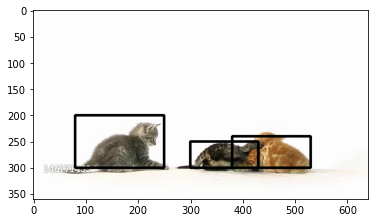

In [6]:
img0_copy = np.copy(img0)

for bbox in bbox0:
    cv2.rectangle(img0_copy, (bbox[0], bbox[1]),(bbox[2], bbox[3]), color=(0,0,0), thickness=3)

plt.imshow(img0_copy)

In [7]:
resize_w = 640
resize_h = 640

(640, 640, 3)

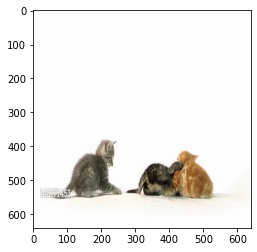

In [8]:
img = cv2.resize(img0, dsize=(resize_w,resize_h), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
img.shape

In [9]:
w_ratio = resize_w/img0.shape[1]
h_ratio = resize_h/img0.shape[0]

print("w_ratio : ", w_ratio)
print("h_ratio : ", h_ratio)

ratio = [w_ratio, h_ratio, w_ratio, h_ratio]
bbox = []

for box in bbox0:
    x1 = int(box[0]*w_ratio)
    x2 = int(box[2]*w_ratio)
    y1 = int(box[1]*h_ratio)
    y2 = int(box[3]*h_ratio)
    bbox.append([x1, y1, x2, y2])

bbox = np.array( bbox)
print("bbox : ", bbox)

w_ratio :  1.0
h_ratio :  1.7777777777777777
bbox :  [[ 80 355 250 533]
 [300 444 430 533]
 [380 426 530 533]]


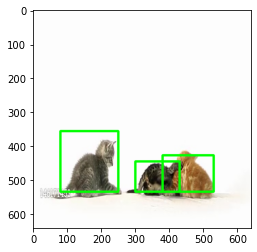

In [10]:
img_copy = np.copy(img)
for box in bbox:
    cv2.rectangle(img_copy, (box[0], box[1]), (box[2], box[3]), color = (0,255,0), thickness=5)

plt.imshow(img_copy)

# Feature extractor

In [11]:
model_vgg = torchvision.models.vgg16(pretrained=True).to(device)
model_resnet50 = torchvision.models.resnet50(pretrained=True).to(device)

In [12]:
features_vgg = list(model_vgg.features)
# features_resnet50 = list(model_resnet50.features)

print("VGG : ", len(features_vgg))
print(features_vgg)
# print("ResNet : ", len(features_resnet50))

VGG :  31
[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), pad

In [13]:
dummy = torch.zeros((1,3,resize_w,resize_h)).float()
print(dummy.shape)

req_features = []
out = dummy.clone().to(device)

for feature in features_vgg:
    out = feature(out)
    print(out.shape)
    if out.shape[2] < resize_w//16:
        break
    req_features.append(feature)
    last_channels = out.shape[1]

print("VGG")   
print("layers : ",len(req_features))
print("last channels : ", last_channels)

torch.Size([1, 3, 640, 640])
torch.Size([1, 64, 640, 640])
torch.Size([1, 64, 640, 640])
torch.Size([1, 64, 640, 640])
torch.Size([1, 64, 640, 640])
torch.Size([1, 64, 320, 320])
torch.Size([1, 128, 320, 320])
torch.Size([1, 128, 320, 320])
torch.Size([1, 128, 320, 320])
torch.Size([1, 128, 320, 320])
torch.Size([1, 128, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 256, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 40, 40])
torch.Size([1, 512, 20, 20])
VGG
layers :  30
last channels :  512


/home/control/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [14]:
faster_r_cnn_extractor = nn.Sequential(*req_features)

In [15]:
transform = transforms.Compose([transforms.ToTensor()])
imgTensor = transform(img).to(device)
imgTensor = imgTensor.unsqueeze(0)
feature_map = faster_r_cnn_extractor(imgTensor)
print(feature_map.shape)

torch.Size([1, 512, 40, 40])


In [16]:
imgArray = feature_map.data.cpu().numpy().squeeze(0)
print("imgArray : ", imgArray.shape)

imgArray :  (512, 40, 40)


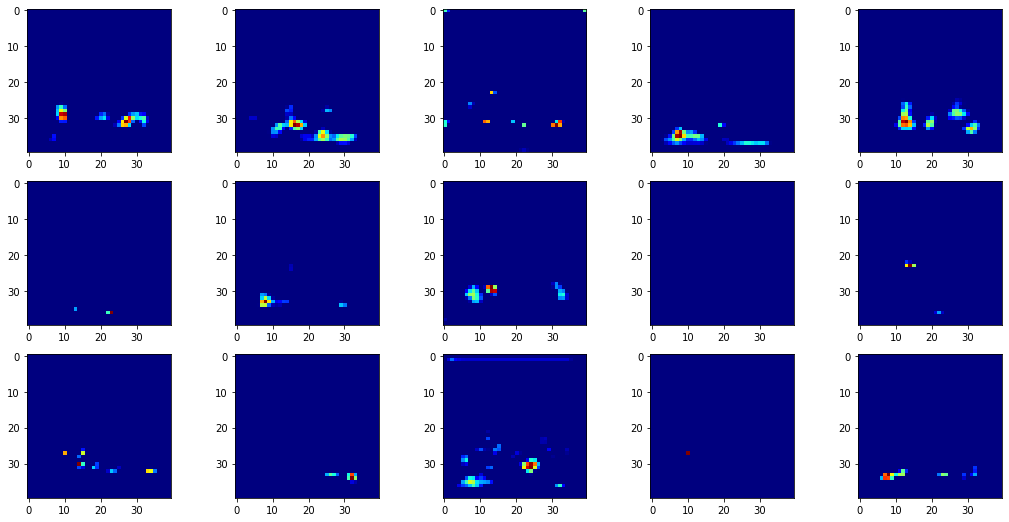

In [17]:
fig = plt.figure(figsize=(18,9))

for i in range(15):
    fig.add_subplot(3,5,i+1)
    plt.imshow(imgArray[i], cmap="jet")


# Generate Anchors Boxes

In [18]:
feature_size = resize_w//16
center_x = np.arange(16,(feature_size + 1)*16, 16)
center_y = np.arange(16,(feature_size + 1)*16, 16)
print("center_x : ", len(center_y))
print(center_y)

center_x :  40
[ 16  32  48  64  80  96 112 128 144 160 176 192 208 224 240 256 272 288
 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576
 592 608 624 640]


In [19]:
center = np.zeros((feature_size**2,2), dtype=np.int32)

for i in range(len(center_x)):
    for j in range(len(center_y)):
        center[i*40+j][0] = center_x[i] -(16//2)
        center[i*40+j][1] = center_y[j] -(16//2)

# center = [[center_x, center_y] ,,,]
print("center : ", center.shape)
print(center)

center :  (1600, 2)
[[  8   8]
 [  8  24]
 [  8  40]
 ...
 [632 600]
 [632 616]
 [632 632]]


Total 1600 center


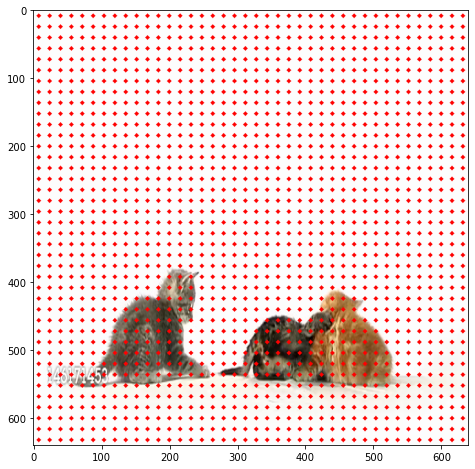

In [20]:
img_copy2 = np.copy(img)
ceter_int = center.astype("int32")

plt.figure(figsize=(8,8))

for xy in center:
    cv2.circle(img_copy2, (xy[0], xy[1]), radius=1, color=(255,0,0), thickness=3)

print(f"Total {len(center)} center")

plt.imshow(img_copy2)
plt.show()

* Generate Anchor boxes

In [21]:
candi_ratio = [0.5,1,2]
candi_scale = [8,16,32]

sub_smapling = 10
print("sub_smapling : ", sub_smapling)

# 40 * 40 * 9 * 4
anchor_boxes = np.zeros(((feature_size * feature_size * 9),4))
anchor_index = 0

for c in center:
    for r in candi_ratio:
        for s in candi_scale:
            w = s * np.sqrt(r) * sub_smapling
            h = s * np.sqrt(1/r)* sub_smapling

            # anchor box = [x1, y1, x2, y2]
            anchor_boxes[anchor_index][0] = c[0] - w/2
            anchor_boxes[anchor_index][1] = c[1] - h/2
            anchor_boxes[anchor_index][2] = c[0] + w/2
            anchor_boxes[anchor_index][3] = c[1] + h/2
            anchor_index += 1
            
print("anchor_boxes : ", anchor_boxes.shape)
print(anchor_boxes[3400:3409])

sub_smapling :  10
anchor_boxes :  (14400, 4)
[[ 38.86291501 223.43145751 265.13708499 336.56854249]
 [-74.27416998 166.86291501 378.27416998 393.13708499]
 [123.71572875 239.43145751 180.28427125 352.56854249]
 [ 95.43145751 182.86291501 208.56854249 409.13708499]
 [ 38.86291501  69.72583002 265.13708499 522.27416998]
 [112.         256.         192.         336.        ]
 [ 72.         216.         232.         376.        ]
 [ -8.         136.         312.         456.        ]
 [ 95.43145751 267.71572875 208.56854249 324.28427125]]


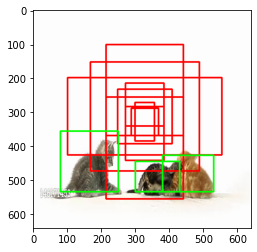

In [22]:
img_copy = np.copy(img)

for i in range(7375, 7384):
    x1 = int(anchor_boxes[i][0])
    y1 = int(anchor_boxes[i][1])
    x2 = int(anchor_boxes[i][2])
    y2 = int(anchor_boxes[i][3])
    
    cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=(255,0,0), thickness=3)
    
for box in bbox:
    cv2.rectangle(img_copy, (box[0], box[1]), (box[2], box[3]), color=(0,255,0), thickness=3)
    
plt.imshow(img_copy)
plt.show()

img : (640, 640, 3)
img border : (1240, 1240, 3)


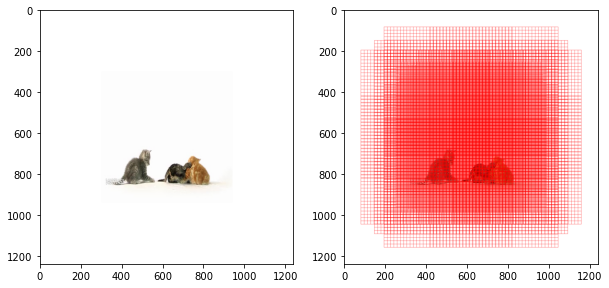

In [23]:
borader = 300

img_copy3 = np.copy(img)
img_copy4 = cv2.copyMakeBorder(img_copy3, borader, borader, borader, borader, cv2.BORDER_CONSTANT, value=(255,255,255))
img_copy5 = np.copy(img_copy4)
print(f"img : {img_copy3.shape}")
print(f"img border : {img_copy4.shape}")

for anchor in anchor_boxes:
    x1 = int(anchor[0])
    y1 = int(anchor[1])
    x2 = int(anchor[2])
    y2 = int(anchor[3])
    
    cv2.rectangle(img_copy5, (x1+borader, y1+borader), (x2+borader, y2+borader), color=(255,0,0))
    

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_copy4)
plt.subplot(122)
plt.imshow(img_copy5)
plt.show()

Target anchors
* Only choose anchor boxes inside the image

In [24]:
valid_anchor_index = np.where(
        (anchor_boxes[:, 0] >= 0) &
        (anchor_boxes[:, 1] >= 0) &
        (anchor_boxes[:, 2] <= img.shape[1]) &
        (anchor_boxes[:, 3] <= img.shape[0]))[0]

print(f"Acnchor inside image : {len(valid_anchor_index)}")

valid_anchor = anchor_boxes[valid_anchor_index]
print(f"Valid anchor : {valid_anchor.shape}")

Acnchor inside image : 7188
Valid anchor : (7188, 4)


* Calculate IOUs

In [25]:
ious = np.zeros((len(valid_anchor), len(bbox)), dtype=np.float32)
ious.fill(0)
print(ious.shape)

# Anchor box
for i, anchor in enumerate(valid_anchor):
    x1, y1, x2, y2 = anchor
    area = (x2 - x1) * (y2 - y1)
    
    # True box
    for j, box in enumerate(bbox):
        x1_t, y1_t, x2_t, y2_t = box
        area_t = (x2_t - x1_t) * (y2_t - y1_t)
        
        inter_x1 = max(x1, x1_t)
        inter_y1 = max(y1, y1_t)
        inter_x2 = min(x2, x2_t)
        inter_y2 = min(y2, y2_t)
        
        inter_area = (inter_x2 - inter_x1) * (inter_y2 - inter_y1)
        
        if (inter_x2 - inter_x1) > 0 and (inter_y2 - inter_y1) > 0:
            iou = inter_area / (area + area_t - inter_area)
        else:
            iou = 0
        ious[i, j] = iou

print(f"IOUs : {ious.shape}")
print(ious[3500:3509, :])


(7188, 3)
IOUs : (7188, 3)
[[0.0336405  0.03061055 0.00871882]
 [0.15140258 0.11298828 0.09063956]
 [0.         0.         0.        ]
 [0.07643807 0.         0.00716952]
 [0.19918925 0.05428032 0.08690229]
 [0.         0.01034751 0.        ]
 [0.         0.12711781 0.        ]
 [0.07366929 0.10830397 0.04250707]
 [0.         0.         0.        ]]


* Sample positive/negative anchor box

In [26]:
# Which box have highest iou with gt
argmax_ious_with_gt = ious.argmax(axis=0)
print(f"Argmax ious with gt : {argmax_ious_with_gt}")

max_ious_with_gt = ious[argmax_ious_with_gt, np.arange(len(bbox))]
print(f"Max ious with gt : {max_ious_with_gt}")

argmax_mask = np.where(ious == max_ious_with_gt)[0]
print(f"# of highest iou with gt : {len(argmax_mask)}")
print(f"Argmax ious with gt : {argmax_mask}")

Argmax ious with gt : [1368 4057 5719]
Max ious with gt : [0.8460013 0.5531547 0.6269531]
# of highest iou with gt : 10
Argmax ious with gt : [1368 4057 4307 4309 4316 4557 5719 5726 5733 5739]


In [27]:
# Which anchor is candidate to gt
argmax_ious = ious.argmax(axis=1)
print(f"Argmax anchor to gt: {argmax_ious.shape}")

max_ious = ious[np.arange(len(valid_anchor)), argmax_ious]
print(f"Max iou anchor to gt : {max_ious.shape}")

Argmax anchor to gt: (7188,)
Max iou anchor to gt : (7188,)


In [28]:
label = np.empty(len(valid_anchor), dtype=np.int32)
label.fill(-1)
print(f"Valid anchor label : {label.shape}")

Valid anchor label : (7188,)


In [29]:
pos_iou_thres = 0.7
neg_iou_thres = 0.3

label[argmax_mask] = 1
label[max_ious >= pos_iou_thres] = 1
label[max_ious <= neg_iou_thres] = 0

pos_anchor = np.where(label ==1)[0]
neg_anchor = np.where(label ==0)[0]
print(f"# of candidate pos anchor : {len(pos_anchor)}")
print(f"# of candidate neg anchor : {len(neg_anchor)}")

# of candidate pos anchor : 15
# of candidate neg anchor : 6615


In [30]:
train_anchor = 256
train_pos_ratio = 0.5

n_pos = int(train_anchor * train_pos_ratio)

if len(pos_anchor) > n_pos:
    disable_mask = np.random.choice(pos_anchor, size=(len(pos_anchor) - n_pos), replace=False)
    label[disable_mask] = -1
    pos_anchor = np.where(label ==1)[0]
    
n_neg = train_anchor - len(pos_anchor)

if len(neg_anchor) > n_neg:
    disable_mask = np.random.choice(neg_anchor, size=(len(neg_anchor) - n_neg), replace=False)
    label[disable_mask] = -1
    
pos_anchor = np.where(label ==1)[0]
neg_anchor = np.where(label ==0)[0]
print(f"# of train pos anchor : {len(pos_anchor)}")
print(f"# of train neg anchor : {len(neg_anchor)}")
print(f"# of not train anchor : {len(label) - len(pos_anchor) - len(neg_anchor)}")

# of train pos anchor : 15
# of train neg anchor : 241
# of not train anchor : 6932


In [31]:
# Anchor candi <-> GT bbox (matching)
max_iou_anchor = bbox[argmax_ious]
print(f"Anchor box with max iou : {max_iou_anchor.shape}")

w_anchor = valid_anchor[:,2] - valid_anchor[:, 0]
h_anchor = valid_anchor[:,3] - valid_anchor[:, 1]
x_c_anchor = valid_anchor[:,0] + w*0.5
y_c_anchor= valid_anchor[:,1] + h*0.5

w_gt = max_iou_anchor[:,2] - max_iou_anchor[:, 0]
h_gt = max_iou_anchor[:,3] - max_iou_anchor[:, 1]
x_c_gt = max_iou_anchor[:,0] + w*0.5
y_c_gt = max_iou_anchor[:,1] + h*0.5

# make W, H >= eps ( 0 -> eps)
eps = np.finfo(h_anchor.dtype).eps
h_anchor = np.maximum(h_anchor, eps)
w_anchor= np.maximum(w_anchor, eps)

tx_gt = (x_c_gt - x_c_anchor) / w_anchor
ty_gt = (y_c_gt - y_c_anchor) / h_anchor
tw_gt = np.log(w_gt/w_anchor)
th_gt = np.log(h_gt/h_anchor)

gt_box = np.column_stack((tx_gt, ty_gt, tw_gt, th_gt))
print(f"GT box with anchor : {gt_box.shape}")



Anchor box with max iou : (7188, 4)
GT box with anchor : (7188, 4)


In [32]:
anchor_labels = np.empty(len(anchor_boxes), dtype=label.dtype)
anchor_box = np.empty((len(anchor_boxes),4), dtype=gt_box.dtype)

anchor_labels.fill(-1)
anchor_box.fill(0)

anchor_labels[valid_anchor_index] = label
anchor_box[valid_anchor_index] = gt_box

print(f"Anchor label for train : {anchor_labels.shape}")
print(f"Anchor box for train : {anchor_box.shape}")

Anchor label for train : (14400,)
Anchor box for train : (14400, 4)


# RPN(Region Proposal Network)
* Define RPN

In [33]:
class RPN(nn.Module):
    def __init__(self, in_ch, mid_ch, n_anchor):
        super(RPN, self).__init__()
        self.sliding_window = nn.Conv2d(in_ch, mid_ch, 3, 1, 1)
        self.reg = nn.Conv2d(mid_ch, n_anchor * 4, 1, 1, 0)
        self.cls = nn.Conv2d(mid_ch, n_anchor * 2, 1, 1, 0)
        self.weight_init()
        
    def weight_init(self):
        self.sliding_window.weight.data.normal_(0, 0.01)
        self.sliding_window.bias.data.zero_()
        self.reg.weight.data.normal_(0, 0.01)
        self.reg.bias.data.zero_()
        self.cls.weight.data.normal_(0, 0.01)
        self.cls.bias.data.zero_()
        
    def forward(self, x):
        x = self.sliding_window(x)
        x_cls = self.cls(x)
        x_reg = self.reg(x)
        
        return x_cls, x_reg

* Classification and Bounding box regression

In [54]:
model_rpn = RPN(512, 512, 9).to(device)
pred_cls, pred_reg = model_rpn(feature_map)

In [55]:
print(f"Output cls : {pred_cls.shape}")
print(f"Output reg : {pred_reg.shape}")

pred_reg = pred_reg.permute(0,2,3,1).contiguous().view(1,-1, 4)
pred_cls = pred_cls.permute(0,2,3,1).contiguous().view(1,-1, 2)
object_score = pred_cls[..., 1].contiguous().view(1,-1)

print(f"Pred cls : {pred_cls.shape}")
print(f"Pred reg : {pred_reg.shape}")
print(f"Pred obj score : {object_score.shape}")



Output cls : torch.Size([1, 18, 40, 40])
Output reg : torch.Size([1, 36, 40, 40])
Pred cls : torch.Size([1, 14400, 2])
Pred reg : torch.Size([1, 14400, 4])
Pred obj score : torch.Size([1, 14400])


In [56]:
pred_cls = pred_cls[0]
pred_reg = pred_reg[0]

print(f"Pred cls : {pred_cls.shape}")
print(f"Pred reg : {pred_reg.shape}")

labels_cls = torch.from_numpy(anchor_labels).to(device)
labels_reg = torch.from_numpy(anchor_box).to(device)

print(f"Anchor label for train : {labels_cls.shape}")
print(f"Anchor box for train : {labels_reg.shape}")

Pred cls : torch.Size([14400, 2])
Pred reg : torch.Size([14400, 4])
Anchor label for train : torch.Size([14400])
Anchor box for train : torch.Size([14400, 4])


* Multitask loss

In [57]:
class MultiTaskLoss(nn.Module):
    def __init__(self, balance_param=10):
        super(MultiTaskLoss, self).__init__()
        self.balance_param = balance_param
        self.sig = nn.Sigmoid()
        self.cls_criterion = nn.CrossEntropyLoss(ignore_index = -1,reduction='mean')
        self.reg_criterion = nn.SmoothL1Loss(reduction='mean')
        
    def forward(self, pred_cls, pred_reg, labels_cls, labels_box):
        
        # Classification loss       
        loss_cls = self.cls_criterion(pred_cls, labels_cls.long())
        print("GT label : ", (labels_cls == 0).sum().item() + (labels_cls == 1).sum().item())
        
        # Bounding box regression loss        
        # Only train regressiong for positive box
        pos_anchor_mask = labels_cls > 0
        
        pos_preds = pred_reg[pos_anchor_mask]
        pos_labels = labels_box[pos_anchor_mask]
        print("GT bbox regression : ", pos_labels.shape[0])
        
        loss_reg = self.reg_criterion(pos_preds, pos_labels)
        
        # Multi task loss        
        loss = loss_cls + self.balance_param * loss_reg        
        
        return loss

In [58]:
criterion = MultiTaskLoss()
loss = criterion(pred_cls, pred_reg, labels_cls, labels_reg)
print(f"Multi task loss : {loss.item()}")

GT label :  256
GT bbox regression :  15
Multi task loss : 0.9433313739035032


# Proposal layer
* Transform anchor boxes

In [59]:
nms_thres = 0.7

n_train_select = 12000
n_train_nms = 2000

n_test_select = 6000
n_test_nms = 300

min_size = 16

In [60]:
# anchor boxes [x1, y1, x2, y2] -> [x_c, y_c, w, h] 
anc_w = anchor_boxes[:, 2] - anchor_boxes[:, 0]
anc_h = anchor_boxes[:, 3] - anchor_boxes[:, 1]
anc_x_c = anchor_boxes[:, 0] + anc_w * 0.5
anc_y_c = anchor_boxes[:, 1] + anc_h * 0.5


In [61]:
# Predicted box [dx, dy, w, h]
pred_reg = pred_reg.cpu().data.numpy()
obj_score_np = object_score[0].cpu().data.numpy()

print(f"Preds reg : {pred_reg.shape}")
print(f"Obj score : {obj_score_np.shape}")

tx = pred_reg[:,0]
ty = pred_reg[:,1]
tw = pred_reg[:,2]
th = pred_reg[:,3]

Preds reg : (14400, 4)
Obj score : (14400,)


In [62]:
# Predicted box coordinates [x_c, y_c, w, h]
x_c = tx * anc_w + anc_x_c
y_c = ty * anc_h + anc_y_c
w = np.exp(tw) * anc_w
h = np.exp(th) * anc_h

print(f"Center x : {x_c.shape}")

Center x : (14400,)


In [64]:
# Predicted ROI by RPN
roi = np.zeros(pred_reg.shape, dtype=gt_box.dtype)
roi[:, 0] = x_c - 0.5 * w
roi[:, 1] = y_c - 0.5 * h
roi[:, 2] = x_c + 0.5 * w
roi[:, 3] = y_c + 0.5 * h

print(f"ROI : {roi.shape}")

ROI : (14400, 4)


* Clip anchor box to img

In [65]:
# Clip(make new min, max)
roi[:, 0::2] = np.clip(roi[:, 0::2], 0, img.shape[1])
roi[:, 1::2] = np.clip(roi[:, 0::2], 0, img.shape[0])

print(f"Clip roi : min - {np.min(roi)}, max - {np.max(roi)}")
                                        

Clip roi : min - 0.0, max - 640.0


In [67]:
roi_w = roi[:, 2] - roi[:, 0]
roi_h = roi[:, 3] - roi[:, 1]

keep = np.where((roi_w >= min_size) & (roi_h >= min_size))[0]

roi = roi[keep]
obj_score_np = obj_score_np[keep]
print(f"Remove smore anchor : roi - {roi.shape}, obj_score - {obj_score_np.shape}")

Remove smore anchor : roi - (14400, 4), obj_score - (14400,)


* Select top-[n_train_select] anchor by [obj_score_np]

In [68]:
order = obj_score_np.argsort()[::-1]
order = order[:n_train_select]

roi = roi[order]
print(f"Selecte roi : {roi.shape}")

Selecte roi : (12000, 4)


* Non-maxima suppression([n_train_nms])

In [69]:
# take all the roi boxes
x1 = roi[:, 0]
y1 = roi[:, 1]
x2 = roi[:, 2]
y2 = roi[:, 3]

# find the areas of all the boxes

areas = (x2 - x1) * (y2 - y1)

In [70]:
# take the indexes of order the probability score in descending order
# non maximum suppression

search = np.linspace(0,n_train_select-1, num=n_train_select, dtype=np.int16)
keep = []

while (search.size > 0):
  i = search[0] # take the 1st elt in order and append to keep
  keep.append(i)

  xx1 = np.maximum(x1[i], x1[search[1:]])
  yy1 = np.maximum(y1[i], y1[search[1:]])
  xx2 = np.minimum(x2[i], x2[search[1:]])
  yy2 = np.minimum(y2[i], y2[search[1:]])

  w = np.maximum(0.0, xx2 - xx1)
  h = np.maximum(0.0, yy2 - yy1)

  inter = w * h
  ovr = inter / (areas[i] + areas[search[1:]] - inter)
  inds = np.where(ovr <= nms_thres)[0]
  search = search[inds + 1]

keep = keep[:n_train_nms] # while training/testing, use accordingly
roi = roi[keep]
print(f"NMS anchor : {roi.shape}")

NMS anchor : (195, 4)


## Proposal Target layer
* Calculate IoUs

In [71]:
n_sample = 128 # number of samples from roi
pos_ratio = 0.25 # number of positive examples out of the n_samples
pos_iou_thresh = 0.5 # min iou of region proposal with any ground truth object to consider it as positive label
neg_iou_thresh_hi = 0.5 # iou 0~0.5 is considered as negative (0, background)
neg_iou_thresh_lo = 0.0

In [72]:
ious = np.empty((len(roi), bbox.shape[0]), dtype=np.float32)
ious.fill(0)

for i, anchor in enumerate(roi):
    xa1,ya1, xa2,ya2 = anchor
    anchor_area = (xa2 - xa1) * (ya2 - ya1)
    
    for j, box in enumerate(bbox):
        xb1, yb1, xb2, yb2 = box
        box_area = (xb2 - xb1) * (yb2 - yb1)
        
        inter_x1 = max(xb1, xa1)
        inter_y1 = max(yb1, ya1)
        inter_x2 = min(xb2, xa2)
        inter_y2 = min(yb2, ya2)
        
        if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
            inter_area = (inter_x2 - inter_x1) * (inter_y2 - inter_y1)
            iou = (inter_area)/(anchor_area + box_area - inter_area)
        else : 
            iou = 0
        ious[i,j] = iou

print(ious.shape)


(195, 3)


In [73]:
gt_assignment = ious.argmax(axis=1)
max_iou = ious.max(axis=1)
print('gt_assignment : ', gt_assignment.shape)
print(gt_assignment)
print("max iou : ", max_iou.shape)
print(max_iou)

gt_roi_label = labels[gt_assignment]
print("gt roi label : ", gt_roi_label.shape)
print(gt_roi_label)

gt_assignment :  (195,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 0 2 0
 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 2]
max iou :  (195,)
[0.23177448 0.06623027 0.12857763 0.15498023 0.08475383 0.3098894
 0.1481671  0.11607314 0.33600184 0.03803997 0.10822856 0.22665788
 0.33114654 0.24561423 0.12104844 0.21985877 0.01733001 0.05245532
 0.5459987  0.10414574 0.55983394 0.02677374 0.10459403 0.20427187
 0.2531345  0.01284462 0.07634742 0.30337858 0.12626934 0.44976625
 0.49645486 0.39133853 0.         0.05695412 0.6949819  0.16906191
 0.55029464 0.25775778 0.09984475 0.32455987 0.00121762 0.05455606
 0.36326763 0.3645923  0.17955013 0.16798738 0.1704773  0.24194366
 0.0455669  0.25481933 0.3

In [74]:
# select the foreground rois as pre the pos_iou_thresh
# and n_sample x pos_ratio (128 x 0.25 = 32) foreground samples

pos_roi_per_image = 32
pos_index = np.where(max_iou >= pos_iou_thresh)[0]
pos_roi_per_this_image = int(min(pos_roi_per_image, pos_index.size))

if pos_index.size > 0:
  pos_index = np.random.choice(
      pos_index, size=pos_roi_per_this_image, replace=False)
  
print(pos_roi_per_this_image)
print(pos_index)

4
[20 34 18 36]


In [75]:
# similarly we do for negative(background) region proposals

neg_index = np.where((max_iou < neg_iou_thresh_hi) &
                     (max_iou >= neg_iou_thresh_lo))[0]
neg_roi_per_this_image = n_sample - pos_roi_per_this_image
neg_roi_per_this_image = int(min(neg_roi_per_this_image, neg_index.size))

if neg_index.size > 0:
  neg_index = np.random.choice(
    neg_index, size = neg_roi_per_this_image, replace=False)
  
print(neg_roi_per_this_image)
print(neg_index)

124
[ 83  94  25  31 134  44 117 184  49  33 174  48 127 104 139 172 175 151
 194 166  58  52  50 176   7 145 154  14  67  41  42 162  12  61  55  45
  74  23  35 144  76  51 114  17 149 116  47 138  10 140  57 163  68 168
  66  95  43 115  53  24  85  86  84   3   5  88 136 152  27 177  19   0
  73 124   6  97 185 101  11  81 146 167  79  99 164 160  98 100 158  96
 142  40 191  78  65 125 186 113 106  75   1 147  21 182 183  16 109  15
 188 153 120  54 170  70 122 141 193 131 112 102 150   4 119  77]


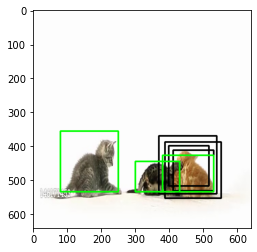

In [76]:
img_clone = np.copy(img)

for i in range(pos_roi_per_this_image):
  x1, y1, x2, y2 = roi[pos_index[i]].astype(int)
  cv2.rectangle(img_clone, (x1, y1), (x2, y2), color=(0,0,0),
                thickness=3)
  
for i in range(len(bbox)):
  cv2.rectangle(img_clone, (bbox[i][0], bbox[i][1]), (bbox[i][2], bbox[i][3]), 
                color = (0, 255, 0), thickness=3)

plt.imshow(img_clone)
plt.show()

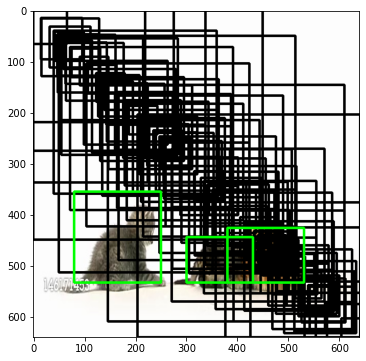

In [77]:
# display RoI samples with negative

img_clone = np.copy(img)

plt.figure(figsize=(9, 6))

for i in range(neg_roi_per_this_image):
  x1, y1, x2, y2 = roi[neg_index[i]].astype(int)
  cv2.rectangle(img_clone, (x1, y1), (x2, y2), color=(0, 0, 0),
                thickness=3)
  
for i in range(len(bbox)):
  cv2.rectangle(img_clone, (bbox[i][0], bbox[i][1]), (bbox[i][2], bbox[i][3]), 
                color = (0, 255, 0), thickness=3)
  
plt.imshow(img_clone)
plt.show()

# Fast R-CNN
* Classifier & Bounding box regressor

In [ ]:
class FastRCNN(nn.Module):
    def __init__(self):
        super(FastRCNN).__init__()
        self.haed = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.Linear(4096, 4096),
        )
        self.classifier = nn.Linear(4096, 2)
        self.regressor = nn.Linear(4096, 2 * 4)
        
    def weight_init(self):
        self.haed.weight.data.normal_(0, 0.01)
        self.haed.bias.data.zero_()
        self.classifier.weight.data.normal_(0, 0.01)
        self.classifier.bias.data.zero_()
        self.regressor.weight.data.normal_(0, 0.01)
        self.regressor.bias.data.zero_()
        
    def forward(self, x):
        x = self.haed(x)
        cls = self.classifier(x)
        reg = self.regressor(x)
        
        return cls, reg

In [ ]:
class LossFastRCNN(nn.Module):
    def __init__(self):
        super(LossFastRCNN).__init__()